# <center>Metody Numeryczne</center>

# Laboratorium 5: Równania liniowe MxN


**Wykonał:** Łukasz Popławski

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.

Dana jest prostokątna macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor zmiennych,
- $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- Do wykonania analizy zużycia pamięci potrzebna jest biblioteka [*memory_profiler*](https://pypi.org/project/memory-profiler/), która do poprawnego działania wymaga doinstalowania pakietu [*setuptools*](https://pypi.org/project/setuptools/). Po instalacji bibliotek może wystąpić błąd związany z brakiem modułu *distutils*. Należy go zignorować i przeładować okno VSCode (lub zrestartować kernela).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [1]:
# !python -m pip install numpy scipy matplotlib memory_profiler setuptools

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%load_ext memory_profiler

---

### **Zadanie 1.**

Zdefiniuj funkcję *`spare_matrix_Abt()`* generującą wektor $m$-wymiarowy $\mathbf{t}$, którego wartości należą do przedziału $[0,1]$ (za pomocą funkcji [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Na podstawie tego wektora funkcja powinna zwracać:
- $\mathbf{b}$ - wektor $m$-wymiarowy, którego wartości dane są funkcją $\cos(4t)$,
- $\mathbf{A}$ - macierz postaci: 

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
$$  

> **Wskazówka:** Do definicji macierzy $\mathbf{A}$ można użyć funkcji [`np.vander()`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) z odpowiednio dobranymi parametrami.

---

### **Zadanie 2.**

Korzystając z funkcji zaimplementowanej w **Zadaniu 1.**, oraz mając dane $m = 50$ i $n = 12$, rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
\left[
\begin{matrix}
    x_0    \\
    x_1    \\
    x_2    \\
    \vdots \\
    x_{n-1}
\end{matrix}
\right]
=
\left[
\begin{matrix}
    b_0    \\
    b_1    \\
    b_2    \\
    \vdots \\
    b_{m-1}
\end{matrix}
\right]
$$

za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ i stosując funkcję [`np.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). Aby wyznaczyć $\mathbf{A}^{\mathrm{T}}\mathbf{A}$ oraz $\mathbf{A}^{\mathrm{T}}\mathbf{b}$ zaimplementuj funkcję *`square_from_rectan()`*.

2. Użycia dedykowanej metody z biblioteki numpy do rozwiązywania problemu najmniejszych kwadratów&mdash;funkcji [`np.linalg.lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html).  

3. Rozkładu QR podanego na wykładzie i wyznaczenia rozwiązania dla układu równań z macierzą trójkątną. Użyć należy funkcji [`np.linalg.qr()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html) i [`sp.linalg.solve_triangular()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

4. Rozkładu SVD podanego na wykładzie. Użyć należy funkcji [`np.linalg.svd()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html).

Po zaimplementowaniu powyższych metod przeprowadź profilowanie kodu w celu analizy czasu wykonania oraz zużycia pamięci każdej z nich. Porównaj jakość otrzymanych wyników.

In [2]:
# ===== Twoja implementacja tutaj =====
metoda = ["Metoda squere_from_rectan", "Default python lstsq", "Metoda rozkład QR", "Metoda roskład SVD"]
time = []
memory = []
norm = []
A, b = main.spare_matrix_Abt(50, 12)

# nr1.
def solve_1(A1, b1) -> np.ndarray:
    At, bt = main.square_from_rectan(A1, b1)
    return  np.linalg.solve(At, bt)
x1 = solve_1(A, b)
t = %timeit -r 5 -n 10 -o solve_1(A, b)
time.append((t).average)
m = %memit -o solve_1(A, b)
memory.append(m)
norm.append(main.residual_norm(A,x1,b))

# nr2.
x2 = np.linalg.lstsq(A, b)
t = %timeit -r 5 -n 10 -o np.linalg.lstsq(A, b)
time.append((t).average)
m = %memit -o np.linalg.lstsq(A, b)
memory.append(m)
norm.append(main.residual_norm(A,x2,b))

# nr3.
def solve_QR(A1, b1):
    Q,R = np.linalg.qr(A1)
    b_q = Q.T @ b1
    return sp.linalg.solve_triangular(R, b_q)
x3 = solve_QR(A,b)
print(x3)
t = %timeit -r 5 -n 10 -o solve_QR(A,b)
time.append((t).average)
m = %memit -o solve_QR(A,b)
memory.append(m)
norm.append(main.residual_norm(A,x3,b))
# nr4.
def solve_SVD(A1, b1):
    U, sigma, V = np.linalg.svd(A, False)
    sigma = np.diag(sigma)
    return V.T @ np.linalg.solve(sigma, U.T @ b)
x4 = solve_SVD(A, b)
t = %timeit -r 5 -n 10 -o solve_SVD(A, b)
time.append((t).average)
m = %memit -o solve_SVD(A, b)
memory.append(m)
norm.append(main.residual_norm(A,x4,b))
for i, text in enumerate(metoda):
    print("",">=====================================<", "", sep="\n")
    print(text)
    print(f"czas:           {time[i]}")
    print(f"pamięć:         {memory[i]}")
    print(f"norma residuum: {norm[i]}")

16.3 μs ± 3.23 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 117.05 MiB, increment: 1.95 MiB
97.6 μs ± 27.1 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 117.88 MiB, increment: 0.00 MiB
[ 1.00000000e+00 -4.22743408e-07 -7.99998124e+00 -3.18763335e-04
  1.06694308e+01 -1.38202905e-02 -5.64707562e+00 -7.53160344e-02
  1.69360697e+00  6.03210145e-03 -3.74241701e-01  8.80405756e-02]
161 μs ± 24.5 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 134.69 MiB, increment: 0.00 MiB
151 μs ± 39.2 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 134.62 MiB, increment: 0.00 MiB

>=====================================<

Metoda squere_from_rectan
czas:           1.6276460000881344e-05
pamięć:         peak memory: 117.05 MiB, increment: 1.95 MiB
norma residuum: 1.2867486776060986e-07

>=====================================<

Default python lstsq
czas:           9.756631999607634e-05
pamięć:         peak memory: 117.8

---

### **Zadanie 3.**

Dane są wydatki ($\mathbf{w}$) oraz dochody ($\mathbf{d}$) dla pewnego gospodarstwa:

$$
\begin{align*}
    \mathbf{w} &= (140, 190, 250, 270, 290, 310, 340, 360, 420, 390)\\
    \mathbf{d} &= (210, 270, 290, 310, 370, 400, 450, 480, 510, 520)
\end{align*}
$$


1. Utwórz regresję liniową zależności wydatków od dochodów.

2. Przeanalizuj jaki jest błąd uzyskanej prostej względem danych. Czy istnieje możliwość uzyskania lepszego wyniku?

> **Wskazówka:** W celu wyznaczenia współczynników wykorzystaj niniejszą informację nt. regresji liniowej [[link](https://en.wikipedia.org/wiki/Simple_linear_regression#Formulation_and_computation)].


In [3]:
# Dane do Zadania 3.
w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

In [4]:
# ===== Twoja implementacja tutaj =====
w_avg = sum(w)/len(w)
d_avg = sum(d)/len(d)

licz = 0
mian = 0
for i in range(len(w)):
    licz += w[i] * (d[i] - d_avg)
    mian += (d[i]-d_avg)**2

a = licz/mian
b = w_avg - (a*d_avg)

line_1 = (a* d)+ b
err = []
for i in range(len(w)):
    error = w[i]-line_1[i]
    err.append(error)
    print(error, sep= ", ")
print(f"\n Błąd na poziomie: {np.linalg.norm(err)}")


-21.577108319954704
-18.74303522523377
25.53498913967323
29.813013504580198
2.647086599301133
-0.9358768533384136
-10.240815941070935
-13.823779393710481
22.593257153649972
-15.267730663896543

 Błąd na poziomie: 58.353555219393854


---

### **Zadanie 4.**

W rzeczywistych problemach często dokładna postać analityczna analizowanego procesu nie jest znana, a dostępne są jedynie jego dane wejściowe i wyjściowe. W tym zadaniu przeprowadzona zostanie symulacja takiego scenariusza oraz opisany zostanie problem poszukiwania modelu analitycznego jak najdokładniej odzwierciedlającego analizowany proces.

<br>

**Punkt 1. Symulacja danych pomiarowych.**

Zdefiniowany jest rzeczywisty proces opisany następującą zależnością:

$$
y = 2 + x_1 - 0.5x_2 + \epsilon
$$

gdzie:
- $y$ - dane wyjściowe procesu,
- $x_1$, $x_2$ - mierzalne zmienne niezależne, które wpływają na proces,
- $\epsilon$ - zakłócenie procesu.

Należy przygotować dane procesu, które posłużą w Punkcie 2. do jego modelowania.

1. Przy użyciu funkcji [`np.random.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj wektory kolumnowe danych wejściowych procesu ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz wektor zakłóceń ($\mathbf{\epsilon}$) o wymiarze $(100,1)$. Każdy z nich powinien charakteryzować się średnią równą $0$ oraz odchyleniem standardowym równym $1$.

2. Oblicz wartości wektora $\mathbf{y}$ (dane wyjściowe procesu), korzystając z podanego wzoru opisującego proces oraz wektorów zdefiniowanych w poprzednim podpunkcie.

<br>

**Punkt 2. Modelowanie procesu.**


W Punkcie 1. opisany został rzeczywisty proces, na podstawie którego przygotowane zostały dane do analizy. W tym punkcie natomiast przyjmuje się założenie, że dokładne równanie procesu ($y = ...$) oraz wektor szumów ($\mathbf{\epsilon}$) nie są znane. Danymi, na których przeprowadzone będzie modelowanie, są jedynie wektory danych wejściowych ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz danych wyjściowych ($\mathbf{y}$).

Wszystkie modele używane w ramach tego zadania będą postaci:

$$
\hat{y} \sim a + z_1 + z_2 + ... + z_n
$$

gdzie:
- $\hat{y}$ - przybliżenie modelowanego procesu,
- $a$ - wyraz wolny,
- $z_1 + z_2 + ... + z_n$ - zmienne niezależne, których ilość dobiera się na podstawie dostępnych danych, tak aby otrzymać jak najlepszy model.

Celem zadania jest wyznaczenie wektora współczynników [regresji liniowej](https://en.wikipedia.org/wiki/Linear_regression) $\mathbf{b}$, co sprowadza się do rozwiązania równania:

$$
\mathbf{y} = b_0 \cdot \mathbf{1} + b_1 \mathbf{z}_1 + b_2 \mathbf{z}_2 + ... + b_n \mathbf{z}_{n}
$$

które w postaci macierzowej przybiera postać:

$$
\mathbf{Z} \mathbf{b} = \mathbf{y}
$$

gdzie:
- $\mathbf{Z}$ - macierz rzeczywistych danych wejściowych do procesu,
- $\mathbf{b}$ - wektor współczynników regresji liniowej do wyliczenia,
- $\mathbf{y}$ - wektor rzeczywistych danych wyjściowych z procesu.

<br>

W ramach zadania przeanalizowane i porównane zostaną poniższe modele:
1. $\hat{y} \sim a + x_1$   
2. $\hat{y} \sim a + x_2$
3. $\hat{y} \sim a + x_1 + x_2$
4. $\hat{y} \sim a + x_1 + x_2 + x_1x_2$

Dla każdego z modeli zdefiniowanych powyżej:

1. Rozpisz analitycznie równanie opisujące model, analogicznie jak w opisie powyżej (np. $\mathbf{y} = b_0 \cdot \mathbf{1} + ... $). Opisz co oznaczają poszczególne elementy wzoru. 

2. Przedstaw otrzymane równanie w formie macierzowej i zdefiniuj $\mathbf{Z}$, $\mathbf{b}$ oraz $\mathbf{y}$. Podaj wymiary każdego z nich oraz napisz z czego wynikają.

3. Wyznacz wektor współczynników regresji liniowej ($\mathbf{b}$) wykorzystując rozkład QR.

4. Przedstaw na wykresie rzeczywiste wartości wyjściowe procesu ($\mathbf{y}$) oraz wyznaczoną funkcję regresji (pomiń ten podpunkt dla ostatniego modelu).


Po przeprowadzeniu analizy dla wszystkich modeli przeanalizuj znanymi metrykami otrzymane wyniki i je opisz.


> **Wskazówka:** Macierz $\mathbf{Z}$ składa się z konkatenacji wektorów kolumnowych zmiennych niezależnych oraz wektora kolumnowego wypełnionego jedynkami, odpowiadającego wyrazowi wolnemu w modelu ($\mathbf{Z} = [\mathbf{1}, \mathbf{z}_1, ... , \mathbf{z}_n]$). Do utworzenia takiej macierzy można posłużyć się funkcją [`np.concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).
>
> Płaszczyznę regresji dla trzeciego modelu można wyrysować stosując [`np.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) oraz [`plot_wireframe()`](https://matplotlib.org/stable/plot_types/3D/wire3d_simple.html).
>
> Rozkład QR w skrócie: dane jest równanie: $\mathbf{A}\mathbf{x} = \mathbf{b}$. Jeżeli zdefiniujemy dodatkowo $\mathbf{A} = \mathbf{Q} \mathbf{R}$ to zachodzi: $\mathbf{R}\mathbf{x} = \mathbf{Q}^T\mathbf{b}$.

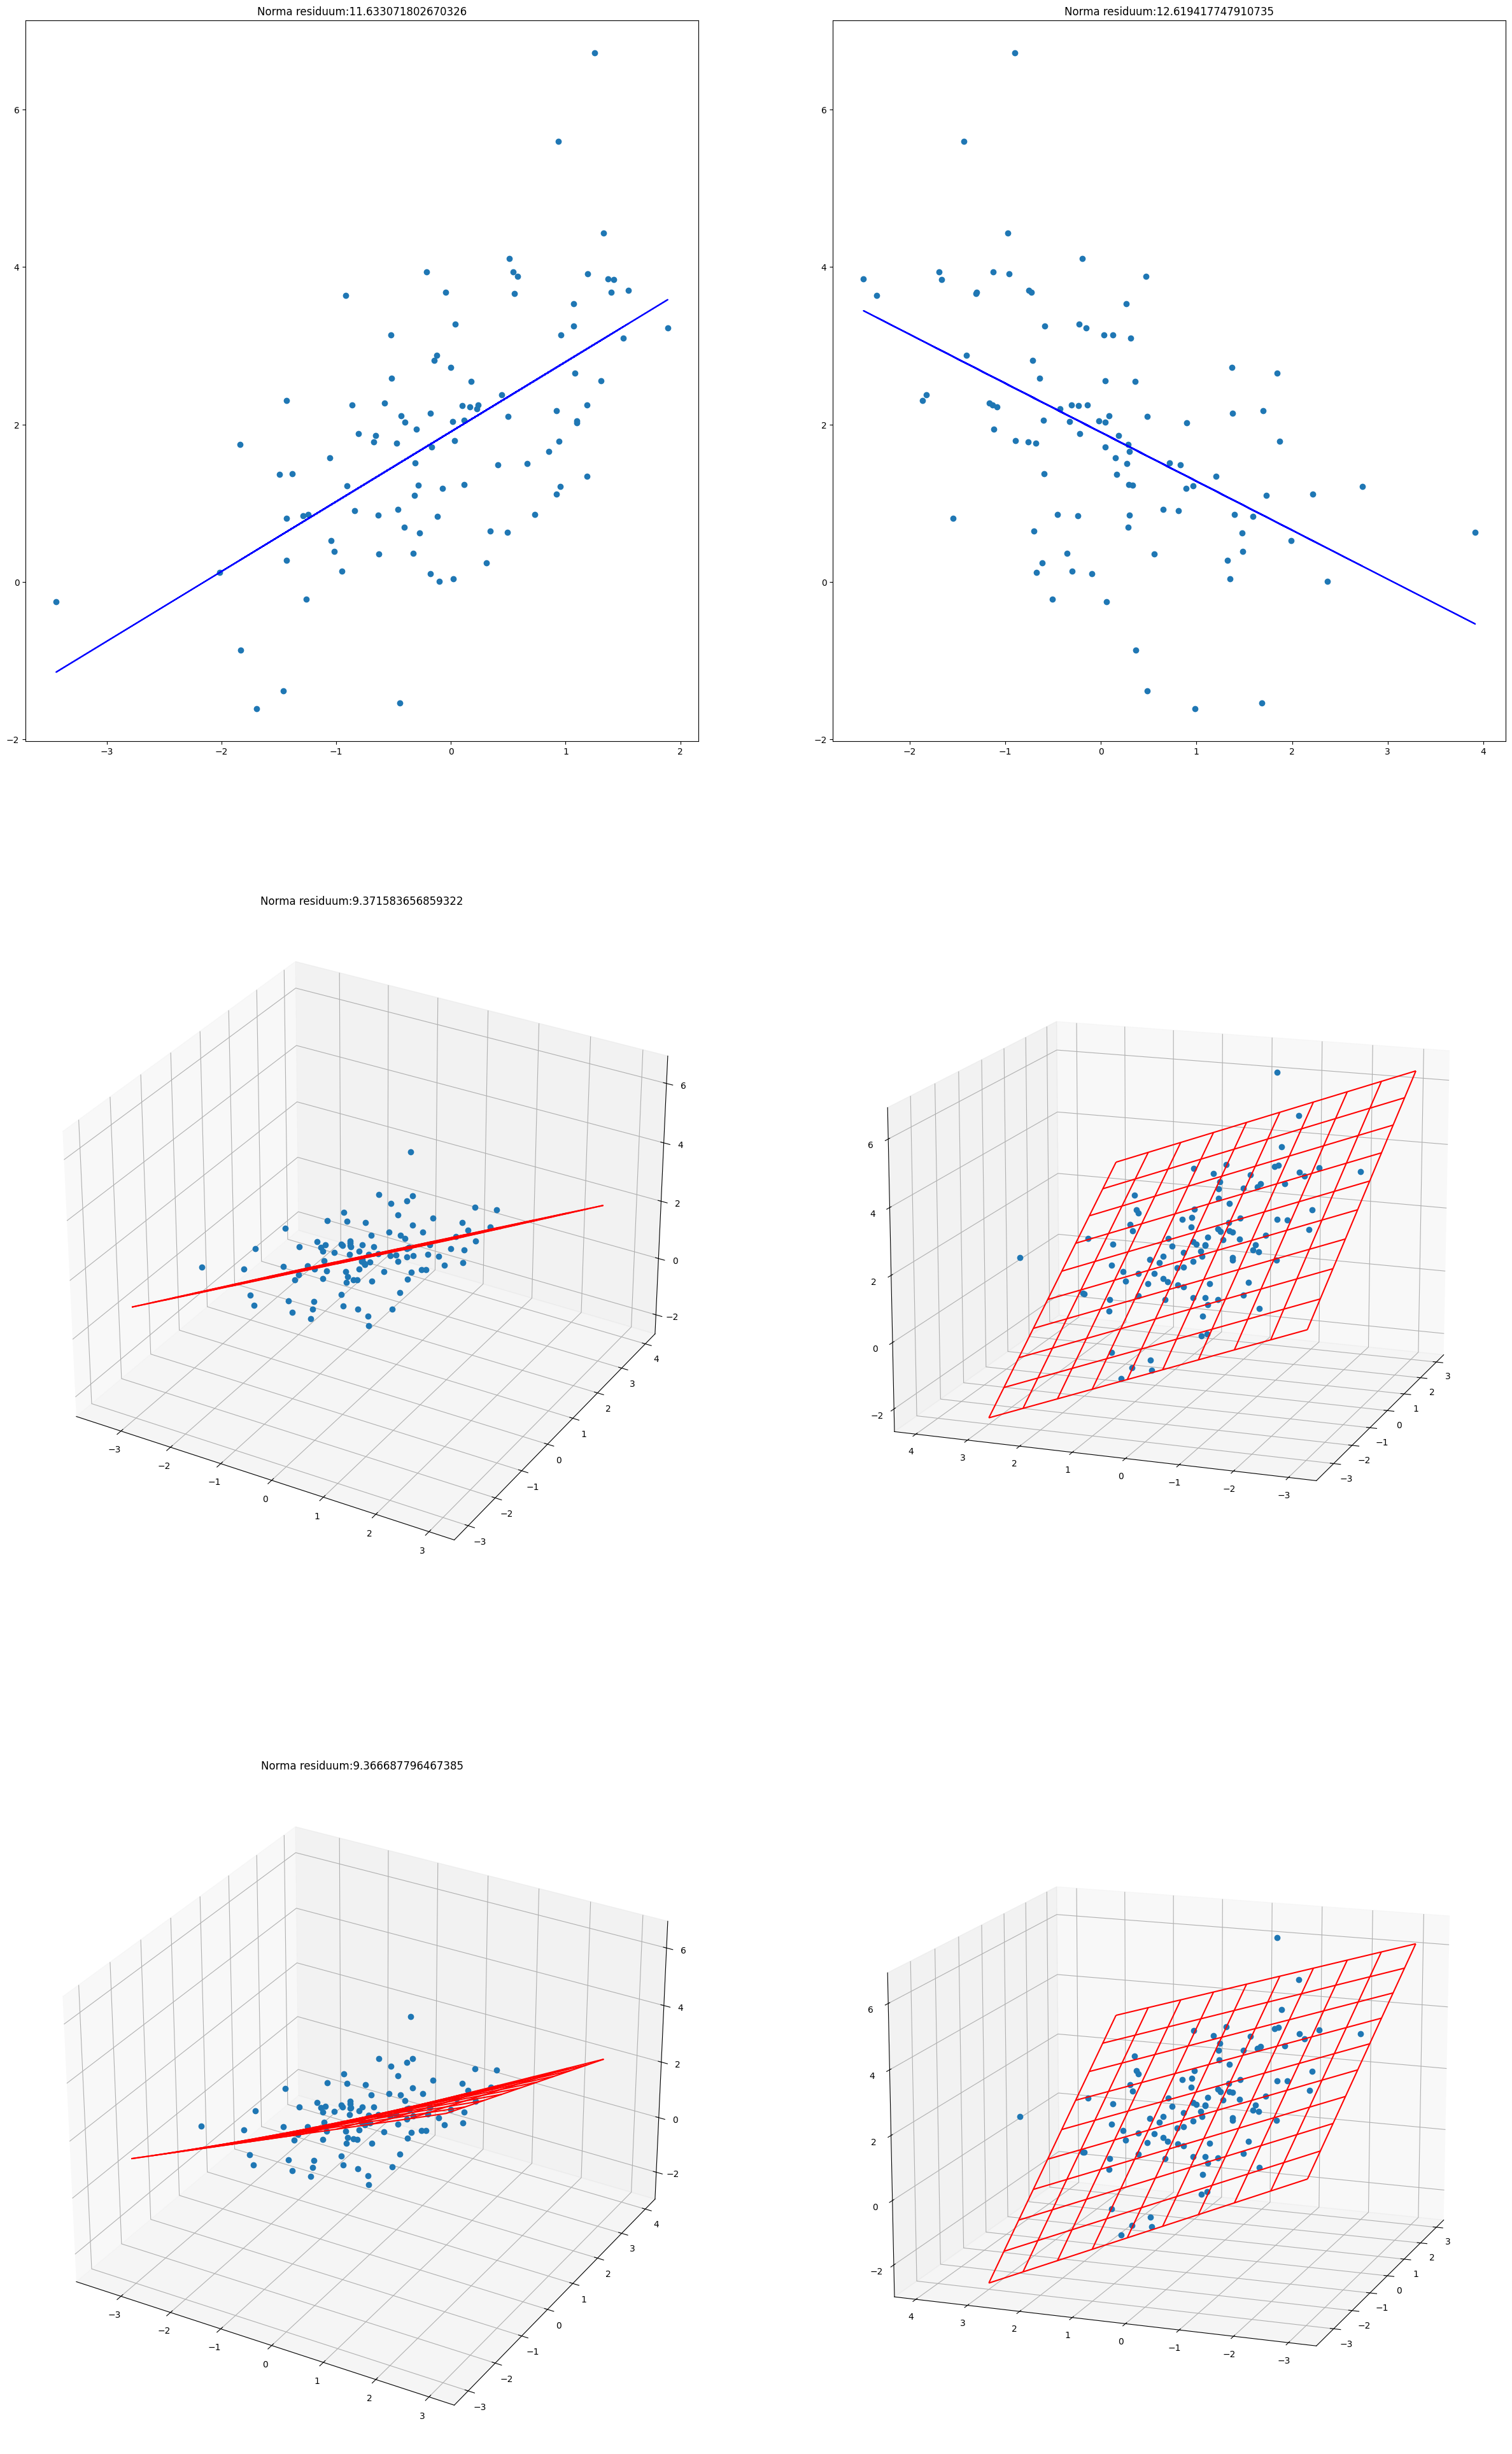

In [16]:
# ===== Twoja implementacja tutaj =====
x1 = np.random.normal(0.0, 1.0, (100,1))
x2 = np.random.normal(0.0, 1.0, (100,1))
e = np.random.normal(0.0, 1.0, (100,1))

one = np.ones((100,1))
uno = np.concatenate([one, x1], 1)
dos = np.concatenate([one, x2], 1)
tres = np.concatenate([one, x1, x2], 1)
quatro = np.concatenate([one, x1,x2, x1*x2], 1)

y = 2 + x1 - 0.5 * x2 + e
tab = [one, dos, tres, quatro]
fig  = plt.figure(figsize=(30,50))
ax0 = fig.add_subplot(3, 2, 1)
ax1 = fig.add_subplot(3, 2, 2)
ax2 = fig.add_subplot(3, 2, 3, projection='3d')
ax3 = fig.add_subplot(3, 2, 4, projection='3d')
ax4 = fig.add_subplot(3, 2, 5, projection='3d')
ax5 = fig.add_subplot(3, 2, 6, projection='3d')
axis = [ax0, ax1, ax2, ax3, ax4, ax5]
norms = []

Q,R = np.linalg.qr(uno)
y_q = Q.T @ y
a = sp.linalg.solve_triangular(R, y_q)
y1 = a[0] + a[1]*x1
norms.append(main.residual_norm(uno, a, y))
axis[0].plot(x1, y, "o")
axis[0].plot(x1, y1, "-b")
axis[0].set(title=f"Norma residuum:{norms[-1]}")

Q,R = np.linalg.qr(dos)
y_q = Q.T @ y
a = sp.linalg.solve_triangular(R, y_q)
y2 = a[0] + a[1]*x2
norms.append(main.residual_norm(dos, a, y))
axis[1].plot(x2, y, "o")
axis[1].plot(x2, y2, "-b")
axis[1].set(title=f"Norma residuum:{norms[-1]}")

Q,R = np.linalg.qr(tres)
y_q = Q.T @ y
a = sp.linalg.solve_triangular(R, y_q)
norms.append(main.residual_norm(tres, a, y))
X, Y = np.meshgrid(np.linspace(-3, 3, 10), np.linspace(-3, 3, 10))
z3 = a[0] + a[1] * X + a[2] * Y
axis[2].plot(x1, x2, y, "o")
axis[2].plot_wireframe(X, Y, z3, color="r")
axis[2].set(title=f"Norma residuum:{norms[-1]}")

axis[3].plot(x1, x2, y, "o")
axis[3].plot_wireframe(X, Y, z3, color="r")
axis[3].view_init(15, 200, 0)
Q,R = np.linalg.qr(quatro)
y_q = Q.T @ y
a = sp.linalg.solve_triangular(R, y_q)
norms.append(main.residual_norm(quatro, a, y))
X, Y = np.meshgrid(np.linspace(-3, 3, 10), np.linspace(-3, 3, 10))
z4 = a[0] + a[1] * X + a[2] * Y + a[3] * X * Y
axis[4].plot(x1, x2, y, "o")
axis[4].plot_wireframe(X, Y, z4, color="r")
axis[4].set(title=f"Norma residuum:{norms[-1]}")

axis[5].plot(x1, x2, y, "o")
axis[5].plot_wireframe(X, Y, z4, color="r")
axis[5].view_init(15, 200, 0)
plt.show()
# dokończ

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)